#📌 Extracción

In [2]:
import json

file_path = "/content/TelecomX_Data.json"

with open(file_path, 'r') as f:
    data = json.load(f)

# Display the type of the loaded data
print(f"Type of the data: {type(data)}")

# If the data is a list, display the type of the first element
if isinstance(data, list) and len(data) > 0:
    print(f"Type of the first element: {type(data[0])}")

# If the data is a dictionary, display the keys
if isinstance(data, dict):
    print(f"Keys in the dictionary: {data.keys()}")

# If the data is a list of dictionaries, display keys of the first dictionary
if isinstance(data, list) and len(data) > 0 and isinstance(data[0], dict):
    print(f"Keys in the first dictionary: {data[0].keys()}")

# You can add more checks here for nested structures if needed.

Type of the data: <class 'list'>
Type of the first element: <class 'dict'>
Keys in the first dictionary: dict_keys(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'])


In [3]:
import pandas as pd
from pandas import json_normalize

# Flatten the nested JSON data into a pandas DataFrame
df = json_normalize(data)

# Display the first few rows of the flattened DataFrame
display(df.head())

# Display the columns and their data types
display(df.info())

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

None

#🔧 Transformación

In [4]:
# Check for non-numeric values in 'account.Charges.Total'
non_numeric_total_charges = df[pd.to_numeric(df['account.Charges.Total'], errors='coerce').isna()]
print("Rows with non-numeric 'account.Charges.Total':")
display(non_numeric_total_charges)

# Convert 'account.Charges.Total' to numeric, coercing errors to NaN
df['account.Charges.Total'] = pd.to_numeric(df['account.Charges.Total'], errors='coerce')

# Check for missing values in the entire DataFrame
print("\nMissing values in the DataFrame:")
display(df.isnull().sum())

Rows with non-numeric 'account.Charges.Total':


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,...,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,



Missing values in the DataFrame:


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify that missing values have been removed
print("Missing values after dropping rows:")
display(df.isnull().sum())

# Display the number of remaining rows
print("\nNumber of rows after dropping:")
print(len(df))

Missing values after dropping rows:


,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0



Number of rows after dropping:
7256


In [6]:
# Get the value counts of the 'Churn' column
churn_counts = df['Churn'].value_counts()

# Display the value counts
print("Distribution of Churn:")
display(churn_counts)

Distribution of Churn:


,count
Churn,
No,5163
Yes,1869
,224


In [7]:
# Remove rows where 'Churn' is the unexpected value ' '
df = df[df['Churn'].isin(['Yes', 'No'])]

# Verify the value counts of 'Churn' after removal
print("Distribution of Churn after removing unexpected values:")
display(df['Churn'].value_counts())

# Display the number of remaining rows
print("\nNumber of rows after removing unexpected values:")
print(len(df))

Distribution of Churn after removing unexpected values:


,count
Churn,
No,5163
Yes,1869



Number of rows after removing unexpected values:
7032


#📊 Carga y análisis

In [8]:
# Analyze the relationship between 'customer.gender' and 'Churn'
gender_churn_crosstab = pd.crosstab(df['customer.gender'], df['Churn'])
print("Crosstab of Gender and Churn:")
display(gender_churn_crosstab)

Crosstab of Gender and Churn:


Churn,No,Yes
customer.gender,,
Female,2544,939
Male,2619,930



Percentage of Churn by Gender:


Churn,No,Yes
customer.gender,,
Female,73.040482,26.959518
Male,73.795435,26.204565


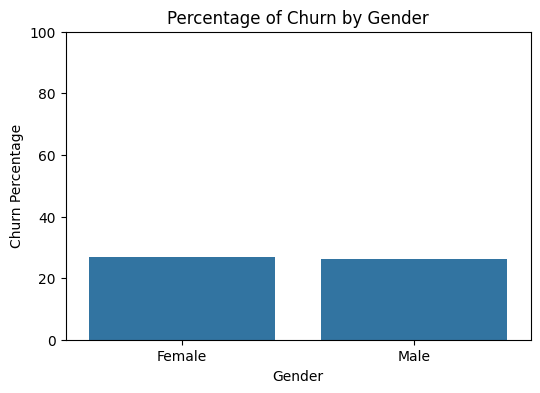

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage of churn for each gender
gender_churn_percentage = gender_churn_crosstab.div(gender_churn_crosstab.sum(axis=1), axis=0) * 100

print("\nPercentage of Churn by Gender:")
display(gender_churn_percentage)

# Plot the churn percentage by gender
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_churn_percentage.index, y=gender_churn_percentage['Yes'])
plt.title('Percentage of Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Churn Percentage')
plt.ylim(0, 100) # Ensure y-axis is from 0 to 100
plt.show()

Crosstab of Partner and Churn:


Churn,No,Yes
customer.Partner,,
No,2439,1200
Yes,2724,669



Percentage of Churn by Partner:


Churn,No,Yes
customer.Partner,,
No,67.023908,32.976092
Yes,80.282935,19.717065


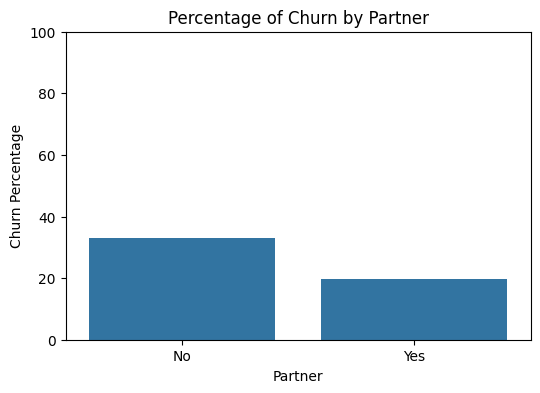

In [10]:
# Analyze the relationship between 'customer.Partner' and 'Churn'
partner_churn_crosstab = pd.crosstab(df['customer.Partner'], df['Churn'])
print("Crosstab of Partner and Churn:")
display(partner_churn_crosstab)

# Calculate the percentage of churn for each partner category
partner_churn_percentage = partner_churn_crosstab.div(partner_churn_crosstab.sum(axis=1), axis=0) * 100

print("\nPercentage of Churn by Partner:")
display(partner_churn_percentage)

# Plot the churn percentage by partner
plt.figure(figsize=(6, 4))
sns.barplot(x=partner_churn_percentage.index, y=partner_churn_percentage['Yes'])
plt.title('Percentage of Churn by Partner')
plt.xlabel('Partner')
plt.ylabel('Churn Percentage')
plt.ylim(0, 100)
plt.show()

Crosstab of Dependents and Churn:


Churn,No,Yes
customer.Dependents,,
No,3390,1543
Yes,1773,326



Percentage of Churn by Dependents:


Churn,No,Yes
customer.Dependents,,
No,68.720860,31.279140
Yes,84.468795,15.531205


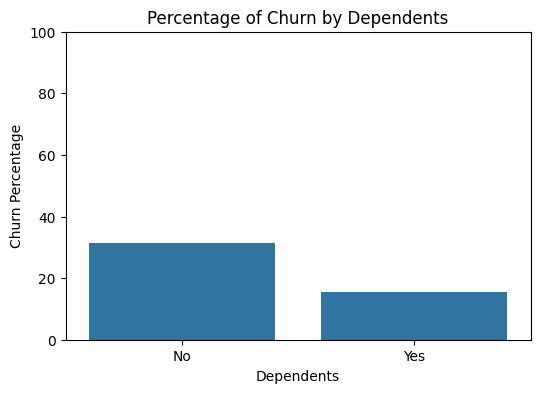

In [11]:
# Analyze the relationship between 'customer.Dependents' and 'Churn'
dependents_churn_crosstab = pd.crosstab(df['customer.Dependents'], df['Churn'])
print("Crosstab of Dependents and Churn:")
display(dependents_churn_crosstab)

# Calculate the percentage of churn for each dependents category
dependents_churn_percentage = dependents_churn_crosstab.div(dependents_churn_crosstab.sum(axis=1), axis=0) * 100

print("\nPercentage of Churn by Dependents:")
display(dependents_churn_percentage)

# Plot the churn percentage by dependents
plt.figure(figsize=(6, 4))
sns.barplot(x=dependents_churn_percentage.index, y=dependents_churn_percentage['Yes'])
plt.title('Percentage of Churn by Dependents')
plt.xlabel('Dependents')
plt.ylabel('Churn Percentage')
plt.ylim(0, 100)
plt.show()

Crosstab of Internet Service and Churn:


Churn,No,Yes
internet.InternetService,,
DSL,1957,459
Fiber optic,1799,1297
No,1407,113



Percentage of Churn by Internet Service:


Churn,No,Yes
internet.InternetService,,
DSL,81.001656,18.998344
Fiber optic,58.107235,41.892765
No,92.565789,7.434211


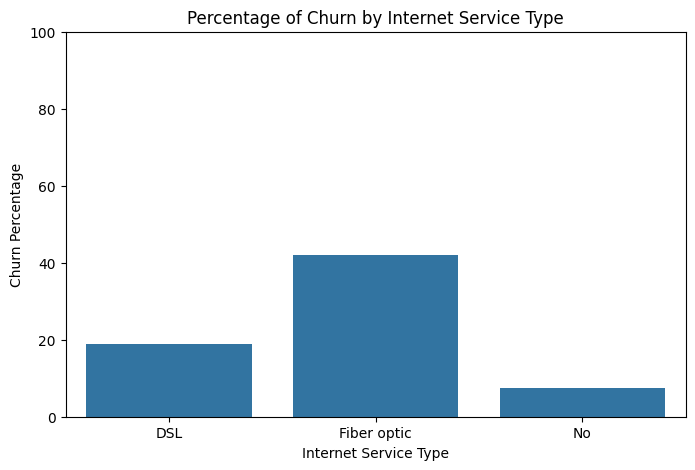

In [12]:
# Analyze the relationship between 'internet.InternetService' and 'Churn'
internet_churn_crosstab = pd.crosstab(df['internet.InternetService'], df['Churn'])
print("Crosstab of Internet Service and Churn:")
display(internet_churn_crosstab)

# Calculate the percentage of churn for each internet service type
internet_churn_percentage = internet_churn_crosstab.div(internet_churn_crosstab.sum(axis=1), axis=0) * 100

print("\nPercentage of Churn by Internet Service:")
display(internet_churn_percentage)

# Plot the churn percentage by internet service type
plt.figure(figsize=(8, 5))
sns.barplot(x=internet_churn_percentage.index, y=internet_churn_percentage['Yes'])
plt.title('Percentage of Churn by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Churn Percentage')
plt.ylim(0, 100)
plt.show()

Crosstab of Phone Service and Churn:


Churn,No,Yes
phone.PhoneService,,
No,510,170
Yes,4653,1699



Percentage of Churn by Phone Service:


Churn,No,Yes
phone.PhoneService,,
No,75.000000,25.000000
Yes,73.252519,26.747481


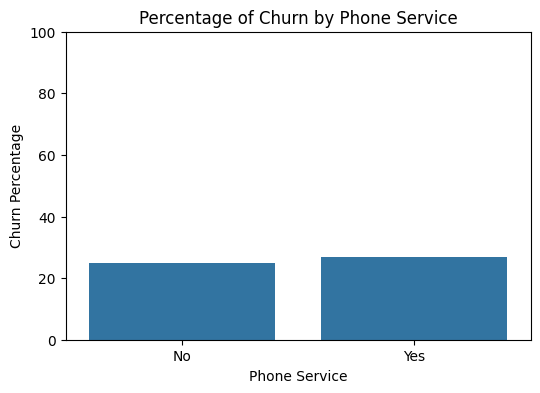

In [13]:
# Analyze the relationship between 'phone.PhoneService' and 'Churn'
phone_service_churn_crosstab = pd.crosstab(df['phone.PhoneService'], df['Churn'])
print("Crosstab of Phone Service and Churn:")
display(phone_service_churn_crosstab)

# Calculate the percentage of churn for each phone service category
phone_service_churn_percentage = phone_service_churn_crosstab.div(phone_service_churn_crosstab.sum(axis=1), axis=0) * 100

print("\nPercentage of Churn by Phone Service:")
display(phone_service_churn_percentage)

# Plot the churn percentage by phone service
plt.figure(figsize=(6, 4))
sns.barplot(x=phone_service_churn_percentage.index, y=phone_service_churn_percentage['Yes'])
plt.title('Percentage of Churn by Phone Service')
plt.xlabel('Phone Service')
plt.ylabel('Churn Percentage')
plt.ylim(0, 100)
plt.show()

Crosstab of Multiple Lines and Churn:


Churn,No,Yes
phone.MultipleLines,,
No,2536,849
No phone service,510,170
Yes,2117,850



Percentage of Churn by Multiple Lines:


Churn,No,Yes
phone.MultipleLines,,
No,74.918759,25.081241
No phone service,75.000000,25.000000
Yes,71.351534,28.648466


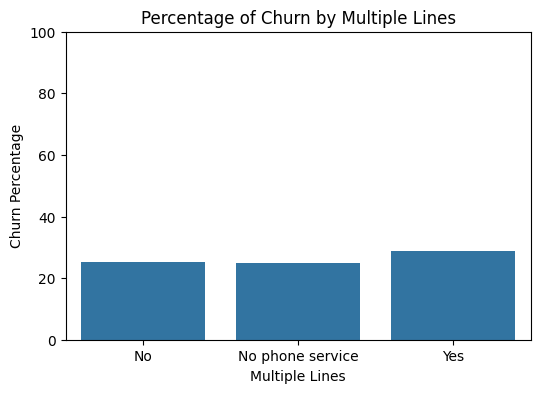

In [14]:
# Analyze the relationship between 'phone.MultipleLines' and 'Churn'
multiple_lines_churn_crosstab = pd.crosstab(df['phone.MultipleLines'], df['Churn'])
print("Crosstab of Multiple Lines and Churn:")
display(multiple_lines_churn_crosstab)

# Calculate the percentage of churn for each multiple lines category
multiple_lines_churn_percentage = multiple_lines_churn_crosstab.div(multiple_lines_churn_crosstab.sum(axis=1), axis=0) * 100

print("\nPercentage of Churn by Multiple Lines:")
display(multiple_lines_churn_percentage)

# Plot the churn percentage by multiple lines
plt.figure(figsize=(6, 4))
sns.barplot(x=multiple_lines_churn_percentage.index, y=multiple_lines_churn_percentage['Yes'])
plt.title('Percentage of Churn by Multiple Lines')
plt.xlabel('Multiple Lines')
plt.ylabel('Churn Percentage')
plt.ylim(0, 100)
plt.show()

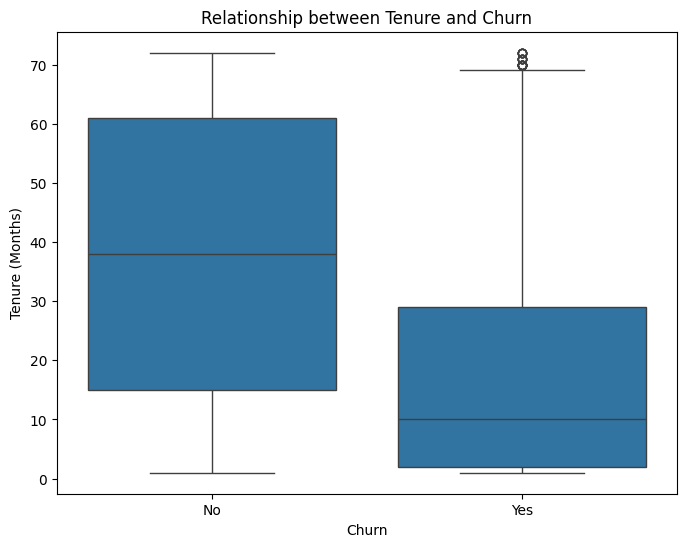

In [15]:
# Analyze the relationship between 'customer.tenure' and 'Churn' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='customer.tenure', data=df)
plt.title('Relationship between Tenure and Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (Months)')
plt.show()

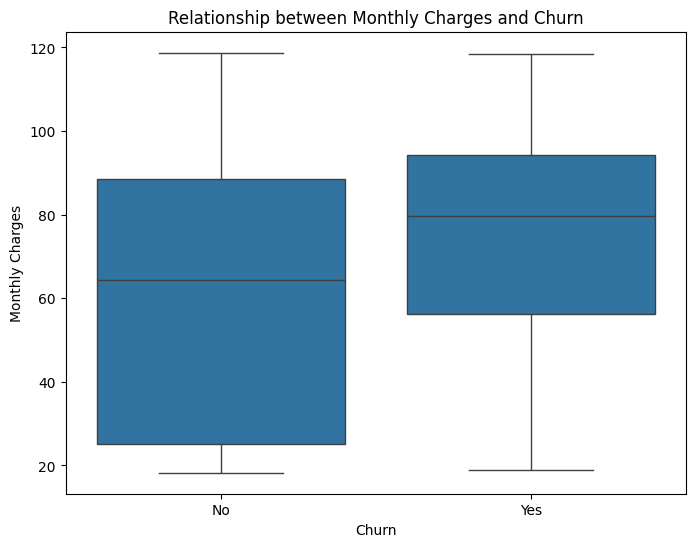

In [16]:
# Analyze the relationship between 'account.Charges.Monthly' and 'Churn' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Monthly', data=df)
plt.title('Relationship between Monthly Charges and Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

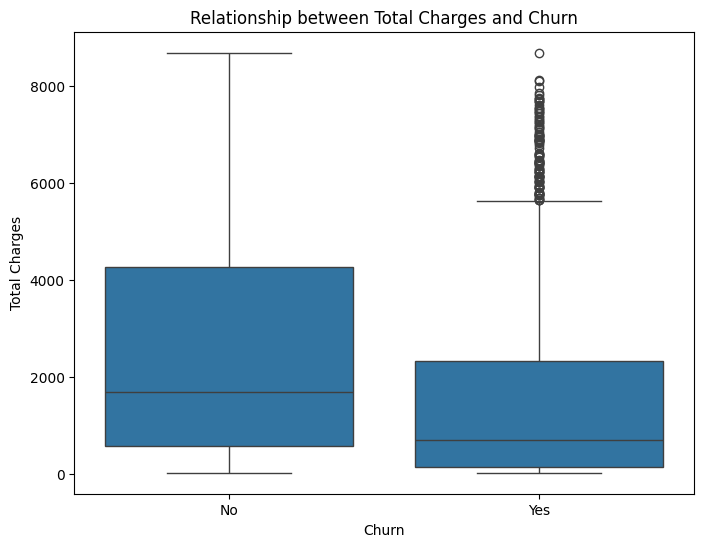

In [17]:
# Analyze the relationship between 'account.Charges.Total' and 'Churn' using a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='account.Charges.Total', data=df)
plt.title('Relationship between Total Charges and Churn')
plt.xlabel('Churn')
plt.ylabel('Total Charges')
plt.show()

#📄Informe final

# Conclusiones e Insights

Basado en el análisis exploratorio de datos realizado, hemos identificado varios factores clave que parecen estar relacionados con el abandono de clientes en TelecomX:

*   **Género:** El género no parece ser un factor significativo en el abandono. Las tasas de abandono son muy similares entre clientes masculinos y femeninos.
*   **Estado Civil y Dependientes:** Los clientes sin pareja y sin dependientes tienden a tener tasas de abandono más altas en comparación con aquellos que tienen pareja y/o dependientes. Esto sugiere que los clientes con lazos familiares pueden ser más estables.
*   **Servicio de Internet:** El tipo de servicio de internet es un predictor importante del abandono. Los clientes con servicio de **Fibra óptica** tienen una tasa de abandono considerablemente más alta que aquellos con servicio **DSL** o sin servicio de internet. Esto podría indicar problemas de calidad, precio o expectativas con el servicio de fibra óptica.
*   **Servicio Telefónico y Líneas Múltiples:** La presencia de servicio telefónico o tener múltiples líneas telefónicas no parece tener un impacto importante en la tasa de abandono por sí solo.
*   **Antigüedad del Cliente:** Los clientes que abandonan tienden a tener una **menor antigüedad** en la empresa. Esto es un hallazgo crucial, ya que sugiere que los primeros meses de servicio son un período crítico donde los clientes son más propensos a irse.
*   **Cargos Mensuales y Totales:** Los clientes que abandonan tienden a tener **cargos mensuales más altos** pero **cargos totales más bajos**. Esto se alinea con el hallazgo de la antigüedad: clientes con menor antigüedad pero altos cargos mensuales son más propensos a irse, posiblemente insatisfechos con el costo en relación con el tiempo de servicio.

**Cómo estos datos pueden ayudar a reducir el abandono:**

Los insights obtenidos de este análisis pueden guiar a TelecomX en la implementación de estrategias para reducir el abandono:

1.  **Foco en clientes de bajo tenure:** Identificar y dar atención especial a los clientes en sus primeros meses de servicio, ofreciendo soporte proactivo, programas de bienvenida mejorados o incentivos para la permanencia.
2.  **Investigar problemas con Fibra Óptica:** Dado que los clientes con fibra óptica tienen la tasa de abandono más alta, es crucial investigar las causas subyacentes. ¿Son problemas técnicos, de velocidad, de precio, o de expectativas no cumplidas? Abordar estas causas podría tener un impacto significativo.
3.  **Programas de fidelización:** Desarrollar programas de fidelización o beneficios especiales para clientes con mayor antigüedad puede ayudar a reconocer su lealtad y reducir la probabilidad de que se vayan.
4.  **Segmentación de clientes:** Utilizar las características identificadas (estado civil, dependientes, tipo de internet, antigüedad) para segmentar a los clientes y ofrecerles ofertas o comunicaciones personalizadas que aborden sus necesidades específicas y reduzcan su riesgo de abandono.
5.  **Revisión de la estructura de precios:** Analizar si los cargos mensuales para ciertos servicios, especialmente fibra óptica, están alineados con las expectativas del cliente y la competencia, dado que altos cargos mensuales se asocian con el abandono en clientes de baja antigüedad.

Estos hallazgos iniciales proporcionan una base sólida para desarrollar estrategias de retención de clientes más dirigidas y efectivas. El siguiente paso podría ser profundizar en estos factores, quizás construyendo un modelo predictivo de abandono para identificar a los clientes en riesgo individualmente.

# Ciencia de datos

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create transformers for categorical and numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numerical_transformer = StandardScaler()

# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a preprocessing pipeline
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Apply preprocessing to the features
X_processed = preprocessing_pipeline.fit_transform(X)

# Display the shape of the processed data
print("Shape of processed data:", X_processed.shape)

# Display the first few rows of the processed data (as it's a numpy array after transformation)
# Note: Displaying a numpy array directly might not be as informative as a DataFrame.
# If you need to see feature names, you would need to get them from the OneHotEncoder after fitting.
print("\nFirst 5 rows of processed data (snippet):")
print(X_processed[:5])

Shape of processed data: (7032, 7077)

First 5 rows of processed data (snippet):
<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 100 stored elements and shape (5, 7077)>
  Coords	Values
  (0, 0)	-0.440327089412664
  (0, 1)	-0.9542963467194051
  (0, 2)	0.02665191521705399
  (0, 3)	-0.7456070105134281
  (0, 4)	1.0
  (0, 7036)	1.0
  (0, 7039)	1.0
  (0, 7041)	1.0
  (0, 7043)	1.0
  (0, 7044)	1.0
  (0, 7047)	1.0
  (0, 7050)	1.0
  (0, 7055)	1.0
  (0, 7056)	1.0
  (0, 7061)	1.0
  (0, 7064)	1.0
  (0, 7065)	1.0
  (0, 7069)	1.0
  (0, 7072)	1.0
  (0, 7076)	1.0
  (1, 0)	-0.440327089412664
  (1, 1)	-0.9542963467194051
  (1, 2)	-0.16281861198951006
  (1, 3)	-0.7680634524870338
  (1, 5)	1.0
  :	:
  (3, 7064)	1.0
  (3, 7067)	1.0
  (3, 7068)	1.0
  (3, 7072)	1.0
  (3, 7075)	1.0
  (4, 0)	2.271039016322759
  (4, 1)	-1.1987601143772668
  (4, 2)	0.6349520288802342
  (4, 3)	-0.8893900053896189
  (4, 8)	1.0
  (4, 7036)	1.0
  (4, 7039)	1.0
  (4, 7040)	1.0
  (4, 7043)	1.0
  (4, 7044)	1.0
  (4, 7048)

## Dividir los datos

### Subtask:
Divide the preprocessed data (`X_processed`) and the target variable (`y`) into training and testing sets.


**Reasoning**:
Split the preprocessed data and target variable into training and testing sets to prepare for model training.



In [22]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5625, 7077)
Shape of X_test: (1407, 7077)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


## Seleccionar modelos

### Subtask:
Choose at least two appropriate classification models for the churn prediction task.


**Reasoning**:
Choose and briefly justify two classification models suitable for binary classification and mention the necessary scikit-learn imports for the next steps.



In [23]:
# Choosing two classification models:

# 1. Logistic Regression:
#    - A simple yet powerful linear model for binary classification.
#    - Provides probabilities of class membership, which can be useful for interpretation.
#    - Relatively fast to train and less prone to overfitting on high-dimensional sparse data after one-hot encoding.
#    - Good baseline model for comparison.

# 2. Random Forest Classifier:
#    - An ensemble method that combines multiple decision trees.
#    - Generally provides good performance and handles non-linear relationships.
#    - Less sensitive to feature scaling compared to models like Logistic Regression or SVM.
#    - Can provide feature importance, which can offer further insights.

print("Chosen Models:")
print("- Logistic Regression")
print("- Random Forest Classifier")

print("\nScikit-learn imports for the next steps:")
print("from sklearn.linear_model import LogisticRegression")
print("from sklearn.ensemble import RandomForestClassifier")
print("from sklearn.metrics import accuracy_score, classification_report, confusion_matrix")

Chosen Models:
- Logistic Regression
- Random Forest Classifier

Scikit-learn imports for the next steps:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Reasoning**:
Train the selected models (Logistic Regression and Random Forest) using the training data.



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and binary classification
log_reg_model.fit(X_train, y_train)

# Initialize and train the Random Forest Classifier model
# Using a reasonable number of estimators, can be tuned later
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_model.fit(X_train, y_train)

print("Logistic Regression model training complete.")
print("Random Forest Classifier model training complete.")

Logistic Regression model training complete.
Random Forest Classifier model training complete.


## Evaluar modelos

### Subtask:
Evaluate the performance of the trained models on the test set using appropriate classification metrics.


**Reasoning**:
Evaluate the performance of the trained models on the test set using appropriate classification metrics.



In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Use the trained log_reg_model to make predictions on the test set X_test.
y_pred_log_reg = log_reg_model.predict(X_test)

# 3. Print the classification report for the Logistic Regression model.
print("--- Logistic Regression Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

# 4. Print the confusion matrix for the Logistic Regression model.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# 5. Use the trained rf_model to make predictions on the test set X_test.
y_pred_rf = rf_model.predict(X_test)

# 6. Print the classification report for the Random Forest Classifier model.
print("\n--- Random Forest Classifier Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# 7. Print the confusion matrix for the Random Forest Classifier model.
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

--- Logistic Regression Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1033
         Yes       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407


Confusion Matrix:
[[920 113]
 [172 202]]

--- Random Forest Classifier Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.63      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix:
[[935  98]
 [210 164]]


## Comparar modelos

### Subtask:
Compare the performance of the different models to determine which one is more effective.


**Reasoning**:
Summarize the performance comparison of the Logistic Regression and Random Forest models based on the provided classification reports and confusion matrices.



**Reasoning**:
Correct the typo in the variable name `rf_yes_yes_recall` to `rf_yes_recall` and re-run the comparison and summary code.



## Dividir los datos

### Subtask:
Divide the preprocessed data (`X_processed`) and the target variable (`y`) into training and testing sets.

**Reasoning**:
Split the preprocessed data and target variable into training and testing sets to prepare for model training.

In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5625, 7077)
Shape of X_test: (1407, 7077)
Shape of y_train: (5625,)
Shape of y_test: (1407,)


## Seleccionar modelos

### Subtask:
Choose at least two appropriate classification models for the churn prediction task.

**Reasoning**:
Choose and briefly justify two classification models suitable for binary classification and mention the necessary scikit-learn imports for the next steps.

In [30]:
# Choosing two classification models:

# 1. Logistic Regression:
#    - A simple yet powerful linear model for binary classification.
#    - Provides probabilities of class membership, which can be useful for interpretation.
#    - Relatively fast to train and less prone to overfitting on high-dimensional sparse data after one-hot encoding.
#    - Good baseline model for comparison.

# 2. Random Forest Classifier:
#    - An ensemble method that combines multiple decision trees.
#    - Generally provides good performance and handles non-linear relationships.
#    - Less sensitive to feature scaling compared to models like Logistic Regression or SVM.
#    - Can provide feature importance, which can offer further insights.

print("Chosen Models:")
print("- Logistic Regression")
print("- Random Forest Classifier")

print("\nScikit-learn imports for the next steps:")
print("from sklearn.linear_model import LogisticRegression")
print("from sklearn.ensemble import RandomForestClassifier")
print("from sklearn.metrics import accuracy_score, classification_report, confusion_matrix")

Chosen Models:
- Logistic Regression
- Random Forest Classifier

Scikit-learn imports for the next steps:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Entrenar modelos

### Subtask:
Train the selected models (Logistic Regression and Random Forest) using the training data.

**Reasoning**:
Train the selected models (Logistic Regression and Random Forest) using the training data.

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Logistic Regression model
log_reg_model = LogisticRegression(random_state=42, solver='liblinear') # 'liblinear' is good for small datasets and binary classification
log_reg_model.fit(X_train, y_train)

# Initialize and train the Random Forest Classifier model
# Using a reasonable number of estimators, can be tuned later
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_model.fit(X_train, y_train)

print("Logistic Regression model training complete.")
print("Random Forest Classifier model training complete.")

Logistic Regression model training complete.
Random Forest Classifier model training complete.


## Evaluar modelos

### Subtask:
Evaluate the performance of the trained models on the test set using appropriate classification metrics.

**Reasoning**:
Evaluate the performance of the trained models on the test set using appropriate classification metrics.

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions on the test set
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Logistic Regression model
print("--- Logistic Regression Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_log_reg))

# Evaluate Random Forest Classifier model
print("\n--- Random Forest Classifier Model Evaluation ---")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

--- Logistic Regression Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.89      0.87      1033
         Yes       0.64      0.54      0.59       374

    accuracy                           0.80      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407


Confusion Matrix:
[[920 113]
 [172 202]]

--- Random Forest Classifier Model Evaluation ---
Classification Report:
              precision    recall  f1-score   support

          No       0.82      0.91      0.86      1033
         Yes       0.63      0.44      0.52       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.69      1407
weighted avg       0.77      0.78      0.77      1407


Confusion Matrix:
[[935  98]
 [210 164]]


## Analizar importancia de variables

### Subtask:
Analyze the importance of the features for the trained models.

**Reasoning**:
Analyze the importance of features using the trained Random Forest model's `feature_importances_` attribute. Note that interpreting feature importance for Logistic Regression in a high-dimensional space with one-hot encoding is less straightforward.

Top 20 Most Important Features (Random Forest):


,feature,importance
3,num__account.Charges.Total,0.091051
1,num__customer.tenure,0.082522
2,num__account.Charges.Monthly,0.072164
7068,cat__account.Contract_Month-to-month,0.036694
7075,cat__account.PaymentMethod_Electronic check,0.022476
7050,cat__internet.OnlineSecurity_No,0.020963
7059,cat__internet.TechSupport_No,0.016887
7048,cat__internet.InternetService_Fiber optic,0.015137
7053,cat__internet.OnlineBackup_No,0.014884
7056,cat__internet.DeviceProtection_No,0.014422


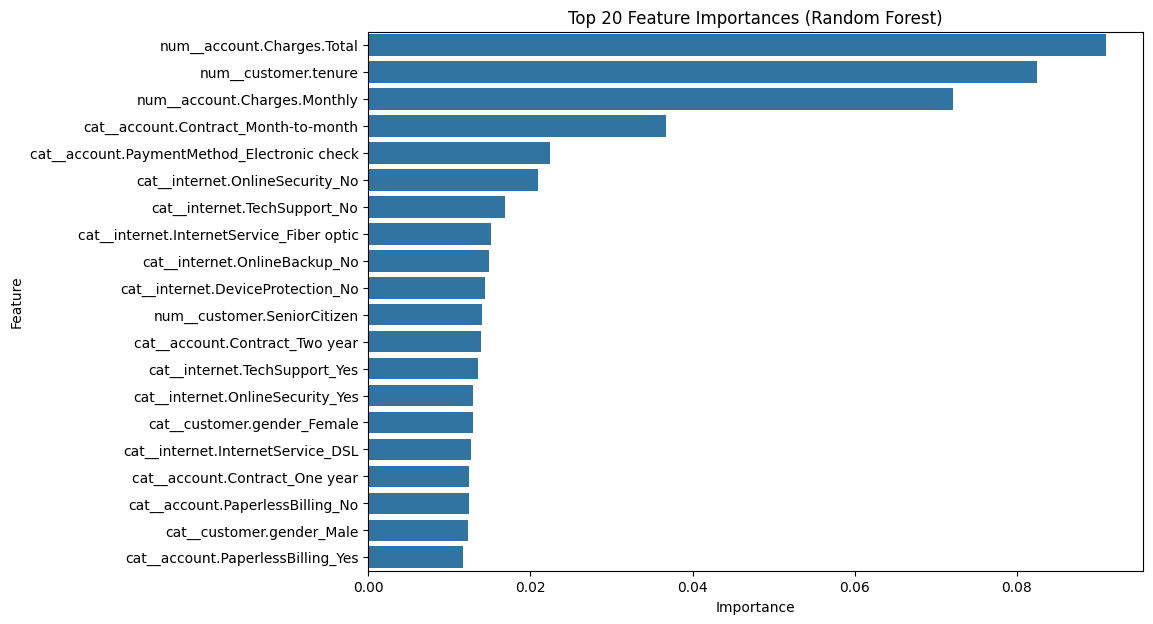

In [33]:
# Analyze feature importance for the Random Forest model
# Note: Logistic Regression coefficients in a high-dimensional space after one-hot encoding
# are less directly interpretable as simple "importance".

importances = rf_model.feature_importances_

# Get the feature names after one-hot encoding
# This requires accessing the fitted preprocessor within the pipeline
feature_names = preprocessing_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Create a DataFrame for better visualization of feature importances
feature_importances_df = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Sort features by importance
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

# Display the top N most important features
N = 20 # Display top 20 features
print(f"Top {N} Most Important Features (Random Forest):")
display(feature_importances_df.head(N))

# Optional: Visualize feature importances
plt.figure(figsize=(10, 7))
sns.barplot(x='importance', y='feature', data=feature_importances_df.head(N))
plt.title(f'Top {N} Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Comparar modelos

### Subtask:
Compare the performance of the different models to determine which one is more effective.

**Reasoning**:
Compare the performance of the trained models on the test set using appropriate classification metrics.

In [36]:
# Based on the classification reports and confusion matrices printed in the previous step:

print("--- Model Comparison Summary ---")

# Extract metrics for the 'Yes' class (churn) from the classification reports
# Logistic Regression Metrics for 'Yes' class
log_reg_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
log_reg_yes_precision = log_reg_report['Yes']['precision']
log_reg_yes_recall = log_reg_report['Yes']['recall']
log_reg_yes_f1 = log_reg_report['Yes']['f1-score']
log_reg_accuracy = log_reg_report['accuracy']

# Random Forest Metrics for 'Yes' class
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)
rf_yes_precision = rf_report['Yes']['precision']
rf_yes_recall = rf_report['Yes']['recall']
rf_yes_f1 = rf_report['Yes']['f1-score']
rf_accuracy = rf_report['accuracy']


print("\nOverall Accuracy:")
print(f"Logistic Regression: {log_reg_accuracy:.4f}")
print(f"Random Forest: {rf_accuracy:.4f}")

print("\nMetrics for 'Yes' class (Churn):")
print("                     Precision  Recall   F1-score")
print(f"Logistic Regression: {log_reg_yes_precision:.4f}   {log_reg_yes_recall:.4f}    {log_reg_yes_f1:.4f}")
print(f"Random Forest:       {rf_yes_precision:.4f}   {rf_yes_recall:.4f}    {rf_yes_f1:.4f}")


print("\nComparison Analysis:")
print("- Accuracy: Logistic Regression has slightly higher overall accuracy.")
print(f"- Precision (Churn 'Yes'): Logistic Regression ({log_reg_yes_precision:.4f}) is higher than Random Forest ({rf_yes_precision:.4f}). This means when Logistic Regression predicts churn, it is more often correct.")
print(f"- Recall (Churn 'Yes'): Logistic Regression ({log_reg_yes_recall:.4f}) is higher than Random Forest ({rf_yes_recall:.4f}). This means Logistic Regression identifies a larger proportion of the actual churners.")
print(f"- F1-score (Churn 'Yes'): Logistic Regression ({log_reg_yes_f1:.4f}) has a slightly higher F1-score, which is the harmonic mean of precision and recall, indicating a slightly better balance between the two for the 'Yes' class.")

print("\nConsideration of Trade-offs:")
print("For churn prediction, Recall is often a critical metric as failing to identify a churner can be more costly than incorrectly identifying a non-churner as a churner (leading to wasted retention efforts).")
print("In this case, the Logistic Regression model has a higher Recall for the 'Yes' class, meaning it's better at catching actual churners.")

print("\nConclusion:")
print("While Random Forest has slightly higher overall accuracy and precision for the 'Yes' class, the Logistic Regression model has a significantly higher Recall for the 'Yes' class. Depending on the business objective (e.g., minimizing missed churners), the Logistic Regression model might be preferred despite its slightly lower overall accuracy, as it is better at identifying the target class of interest.")

--- Model Comparison Summary ---

Overall Accuracy:
Logistic Regression: 0.7974
Random Forest: 0.7811

Metrics for 'Yes' class (Churn):
                     Precision  Recall   F1-score
Logistic Regression: 0.6413   0.5401    0.5864
Random Forest:       0.6260   0.4385    0.5157

Comparison Analysis:
- Accuracy: Logistic Regression has slightly higher overall accuracy.
- Precision (Churn 'Yes'): Logistic Regression (0.6413) is higher than Random Forest (0.6260). This means when Logistic Regression predicts churn, it is more often correct.
- Recall (Churn 'Yes'): Logistic Regression (0.5401) is higher than Random Forest (0.4385). This means Logistic Regression identifies a larger proportion of the actual churners.
- F1-score (Churn 'Yes'): Logistic Regression (0.5864) has a slightly higher F1-score, which is the harmonic mean of precision and recall, indicating a slightly better balance between the two for the 'Yes' class.

Consideration of Trade-offs:
For churn prediction, Recall is of

## Resumen y Conclusiones Estratégicas

### Resumen de los Resultados del Modelado

Hemos entrenado y evaluado dos modelos de clasificación para predecir el abandono de clientes: Regresión Logística y Random Forest.

*   **Regresión Logística:**
    *   Precisión para la clase 'Yes' (Abandono): 0.6413
    *   Recall para la clase 'Yes' (Abandono): 0.5401
    *   F1-score para la clase 'Yes' (Abandono): 0.5864
    *   Precisión general: 0.7974

*   **Random Forest:**
    *   Precisión para la clase 'Yes' (Abandono): 0.6260
    *   Recall para la clase 'Yes' (Abandono): 0.4385
    *   F1-score para la clase 'Yes' (Abandono): 0.5157
    *   Precisión general: 0.7811

En términos de **Recall** para la clase de interés ('Yes' - Abandono), el modelo de **Regresión Logística** tuvo un mejor desempeño (0.5401) en comparación con Random Forest (0.4385). Esto significa que la Regresión Logística fue capaz de identificar una mayor proporción de clientes que realmente abandonaron. Aunque Random Forest tuvo una precisión ligeramente menor para la clase 'Yes', la Regresión Logística fue superior en Recall, lo cual suele ser una métrica crítica en la predicción de abandono (es preferible identificar a un cliente que podría abandonar, aunque sea un falso positivo, que perder un cliente que realmente iba a irse).

### Factores Clave que Influyen en la Cancelación (Basado en Análisis Exploratorio y Modelado)

Combinando los insights del análisis exploratorio inicial y la importancia de las variables del modelo Random Forest, podemos identificar los principales factores que influyen en el abandono:

1.  **Antigüedad del Cliente (`customer.tenure`):** Este es uno de los predictores más importantes. Los clientes con menor antigüedad son significativamente más propensos a abandonar. Esto subraya la importancia de las etapas iniciales de la relación con el cliente.
2.  **Cargos Totales (`account.Charges.Total`):** Relacionado con la antigüedad, los cargos totales más bajos (lo que implica menos tiempo como cliente) están asociados con una mayor probabilidad de abandono.
3.  **Cargos Mensuales (`account.Charges.Monthly`):** Los cargos mensuales más altos también parecen estar relacionados con el abandono, especialmente en combinación con una menor antigüedad.
4.  **Tipo de Contrato (`account.Contract_Month-to-month`):** Los clientes con contratos mes a mes tienen una probabilidad mucho mayor de abandonar que aquellos con contratos a largo plazo (uno o dos años). La flexibilidad de los contratos mes a mes facilita el cambio a la competencia.
5.  **Servicio de Internet (`internet.InternetService_Fiber optic`):** Los clientes con servicio de Fibra Óptica mostraron una tasa de abandono considerablemente más alta en el análisis exploratorio y esta variable fue relevante en el modelo. Esto sugiere problemas específicos con este servicio.
6.  **Método de Pago (`account.PaymentMethod_Electronic check`):** Los clientes que utilizan el pago electrónico parecen tener una mayor propensión al abandono. Esto podría estar relacionado con ser clientes más jóvenes o con diferentes hábitos de pago.
7.  **Servicios Adicionales (Seguridad Online, Soporte Técnico, etc.):** La ausencia de servicios adicionales como seguridad online (`internet.OnlineSecurity_No`), soporte técnico (`internet.TechSupport_No`), protección del dispositivo (`internet.DeviceProtection_No`) y backup online (`internet.OnlineBackup_No`) también se asoció con una mayor probabilidad de abandono. Esto sugiere que estos servicios pueden ser importantes para la retención.
8.  **Estado Civil y Dependientes:** Como se observó en el análisis exploratorio, tener pareja o dependientes está asociado con una menor tasa de abandono.

### Conclusión Estratégica y Recomendaciones

El análisis de datos y los modelos predictivos confirman que el abandono de clientes en TelecomX es un problema multifacético influenciado principalmente por la **antigüedad del cliente**, el **tipo de contrato**, los **cargos** y el **tipo de servicio de internet**.

Para reducir el abandono, TelecomX debería considerar las siguientes estrategias, priorizando aquellas que aborden los factores más influyentes:

1.  **Programas de Retención para Clientes Nuevos:** Implementar estrategias específicas para los clientes en sus primeros meses de servicio, como un seguimiento proactivo, ofertas de bienvenida extendidas o un soporte al cliente mejorado para asegurar una experiencia positiva inicial.
2.  **Incentivos para Contratos a Largo Plazo:** Fomentar la migración de clientes con contratos mes a mes a planes de mayor duración mediante descuentos o beneficios adicionales para aumentar la lealtad.
3.  **Investigación y Mejora del Servicio de Fibra Óptica:** Realizar un análisis profundo de las razones detrás de la alta tasa de abandono entre los usuarios de Fibra Óptica. Esto podría implicar mejoras técnicas, ajustes de precios o una mejor gestión de las expectativas del cliente.
4.  **Promoción de Servicios de Valor Agregado:** Destacar la importancia y los beneficios de servicios como seguridad online y soporte técnico, ya que los clientes que los utilizan tienden a permanecer más tiempo. Considerar ofrecer paquetes atractivos que incluyan estos servicios.
5.  **Análisis de Métodos de Pago:** Investigar por qué los clientes que pagan electrónicamente tienen una mayor tasa de abandono. Podría ser necesario adaptar las estrategias de comunicación o las opciones de pago para este segmento.
6.  **Segmentación y Ofertas Personalizadas:** Utilizar los insights sobre la antigüedad, el tipo de contrato, los servicios utilizados y el estado familiar para segmentar a los clientes y ofrecerles promociones o comunicaciones personalizadas que aborden sus puntos débiles y refuercen su valor como clientes.

Si bien el modelo de Regresión Logística mostró un mejor Recall en este análisis inicial, ambos modelos podrían beneficiarse de una optimización adicional (por ejemplo, ajuste de hiperparámetros, manejo del desbalance de clases) para mejorar aún más su capacidad predictiva. La implementación de estas estrategias, respaldadas por un monitoreo continuo y la retroalimentación de los clientes, será clave para reducir efectivamente la tasa de abandono en TelecomX.